<a href="https://colab.research.google.com/github/muzammil002/Deep_Learning_Project/blob/main/Monkey_Breed_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muzammilayub","key":"caca7b8fa1caa9e69f9ad764109dc54e"}'}

In [2]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                      2022 Ukraine Russia War                            2KB  2022-04-09 16:53:18           6565        376  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease  Personal Key Indicators of Heart Disease           3MB  2022-02-16 10:18:03          10108        219  1.0              
datasets/ankanhore545/cost-of-living-index-2022                Cost of Living Index 2022                          4KB  2022-04-09 06:22:10           2284         34  0.8235294        
datasets/prasertk/b

In [3]:
!kaggle datasets download -d slothkong/10-monkey-species

 99% 539M/547M [00:02<00:00, 255MB/s]
100% 547M/547M [00:02<00:00, 243MB/s]


In [4]:
!unzip \*.zip  && rm *.zip

Archive:  10-monkey-species.zip
  inflating: monkey_labels.txt       
  inflating: training/training/n0/n0018.jpg  
  inflating: training/training/n0/n0019.jpg  
  inflating: training/training/n0/n0020.jpg  
  inflating: training/training/n0/n0021.jpg  
  inflating: training/training/n0/n0022.jpg  
  inflating: training/training/n0/n0023.jpg  
  inflating: training/training/n0/n0024.jpg  
  inflating: training/training/n0/n0025.jpg  
  inflating: training/training/n0/n0026.jpg  
  inflating: training/training/n0/n0027.jpg  
  inflating: training/training/n0/n0028.jpg  
  inflating: training/training/n0/n0029.jpg  
  inflating: training/training/n0/n0030.jpg  
  inflating: training/training/n0/n0031.jpg  
  inflating: training/training/n0/n0032.jpg  
  inflating: training/training/n0/n0033.jpg  
  inflating: training/training/n0/n0034.jpg  
  inflating: training/training/n0/n0035.jpg  
  inflating: training/training/n0/n0036.jpg  
  inflating: training/training/n0/n0037.jpg  
  inflatin

In [17]:
import tensorflow as tf  #tf >2.0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import models,layers
import numpy as np
import matplotlib.pyplot as plt

#Using the Imagedata generator to rescale the image 

Which Generate batches of tensor image data with real-time data augmentation

In [6]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                    zoom_range=0.2,
                                  vertical_flip=True,
                                  horizontal_flip=True)

In [12]:
# Training Set
training_set = train_datagen.flow_from_directory(r'/content/training/training',
                                                 target_size=(224,224),class_mode='categorical',batch_size=16
                                         )

Found 1098 images belonging to 10 classes.


In [13]:
# Test Set
test_datagen= ImageDataGenerator(rescale=1./255)

test_set= test_datagen.flow_from_directory(r'/content/validation/validation',
                                          target_size=(224,224),class_mode='categorical',batch_size=16)

Found 272 images belonging to 10 classes.


In [ ]:
def image_show(num_image,label):
    from matplotlib import pyplot as plt
    import random
    import cv2
    import os
    for i in range(num_image):
        imgdir = Path(f'{root}/training/training/' + label)
        imgfile = random.choice(os.listdir(imgdir))
        img = cv2.imread(f'{root}/training/training/'+ label +'/'+ imgfile)
        plt.figure(i)
        plt.imshow(img)
        plt.title(imgfile)
    plt.show()

In [ ]:
print(labels[4])
image_show(3,'n4')

#Creating CNN Model

In [14]:
#Initalising the CNN
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [15]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [26]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
filepath=("/content/monkey.h5f")
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history=cnn.fit(x = training_set, validation_data = test_set, epochs = 10,callbacks=callbacks_list, 
                              verbose = 1
)

Epoch 1/10
69/69 [==============================] - 48s 696ms/step - loss: 1.1194 - accuracy: 0.5902 - val_loss: 1.7237 - val_accuracy: 0.4632
Epoch 2/10
69/69 [==============================] - 46s 666ms/step - loss: 1.0553 - accuracy: 0.6321 - val_loss: 1.2425 - val_accuracy: 0.5662
Epoch 3/10
69/69 [==============================] - 46s 677ms/step - loss: 1.0067 - accuracy: 0.6421 - val_loss: 1.4880 - val_accuracy: 0.5294
Epoch 4/10
69/69 [==============================] - 46s 664ms/step - loss: 0.9378 - accuracy: 0.6758 - val_loss: 1.3161 - val_accuracy: 0.5515
Epoch 5/10
69/69 [==============================] - 46s 658ms/step - loss: 0.9512 - accuracy: 0.6785 - val_loss: 1.2061 - val_accuracy: 0.6140
Epoch 6/10
69/69 [==============================] - 47s 674ms/step - loss: 0.8981 - accuracy: 0.6958 - val_loss: 1.2791 - val_accuracy: 0.5772
Epoch 7/10
69/69 [==============================] - 46s 672ms/step - loss: 0.8281 - accuracy: 0.7040 - val_loss: 1.3195 - val_accuracy: 0.6213

#Categorical crossentropy is a loss function that is used in multi-class classification tasks. 
These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one.

We are doing the multi class classification of Monkey breed and there are 10 classes of monkey

In [27]:
scores=cnn.evaluate(test_set)

17/17 [==============================] - 7s 434ms/step - loss: 1.2724 - accuracy: 0.6360


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

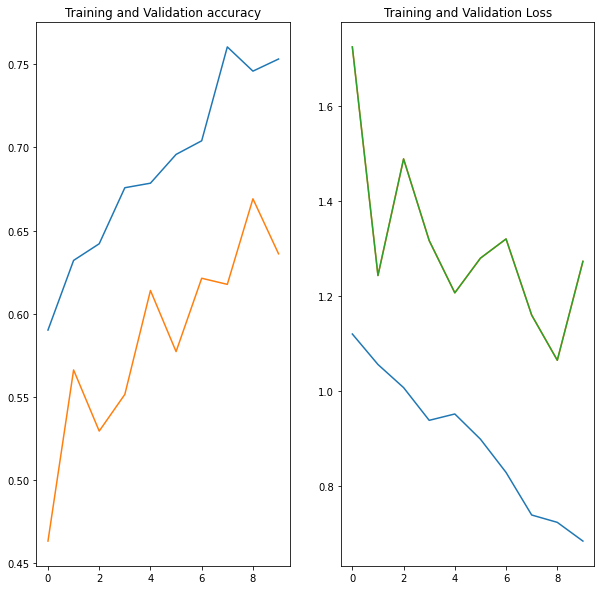

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(10),acc,label="Training_Accuracy")
plt.plot(range(10),val_acc,label="val_acc")
plt.title('Training and Validation accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(10),loss,label="loss")
plt.plot(range(10),val_loss,label="val_loss")
plt.title('Training and Validation Loss')
plt.plot(range(10),val_loss,label="val_loss")



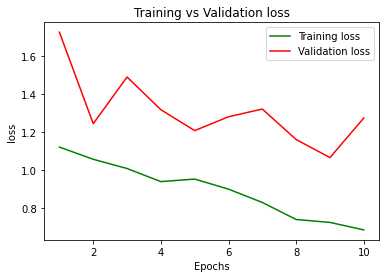

In [31]:
import matplotlib.pyplot as plt
loss_train=history.history['loss']
loss_val=history.history['val_loss']
epochs=range(1,11)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'r',label='Validation loss')
plt.title("Training vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

#Testing the model

In [32]:
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing import image

In [33]:
txt=pd.read_csv(r'/content/monkey_labels.txt')

In [34]:
txt

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [ ]:
labels = txt['Common Name']
labels

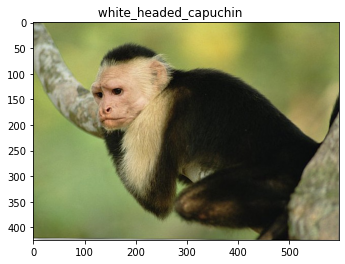

In [36]:
test_image=r'/content/training/training/n5/n5022.jpg'
open_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
result=np.argmax(result)
Name=txt.iloc[result]
Name=Name.iloc[2]
plt.imshow(open_image)
plt.title(Name)
plt.show()

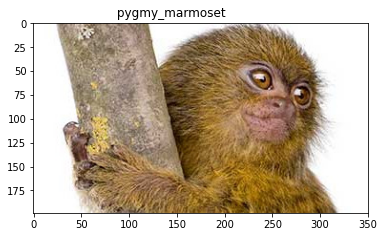

In [37]:
#/content/training/training/n4/n4016.jpg
test_image=r'/content/training/training/n4/n4016.jpg'
open_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
result=np.argmax(result)
Name=txt.iloc[result]
Name=Name.iloc[2]
plt.imshow(open_image)
plt.title(Name)
plt.show()